In [42]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.losses import SparseCategoricalCrossentropy
# from tensorflow.keras.optimizers import Adam

# import matplotlib.pyplot as plt
# import numpy as np

# cifar10 = keras.datasets.cifar10
# (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# print(train_images.shape)
# expected_input_shape = (32, 32, 3)
# print(f"Expected input shape: {expected_input_shape}")
# print(f"train_labels shape: {train_labels.shape}")
# total_elements = train_images.size
# print(f"Total elements in train_images: {total_elements}")
# expected_elements = np.prod(expected_input_shape)
# print(f"Expected number of elements: {expected_elements}")
# if total_elements != expected_elements:
#     print("Error: The total number of elements in train_images does not match the expected number of elements based on the expected input shape.")
# # The actual input shape is (32, 32, 3, 50000)
# # Reshape the array to match the expected input shape
# train_images = np.reshape(train_images, (50000, 32, 32, 3))
# train_images = tf.reshape(train_images, shape=(-1, 28, 28, 1))
# print(train_images.shape)

(50000, 32, 32, 3)
Expected input shape: (32, 32, 3)
train_labels shape: (50000, 1)
Total elements in train_images: 153600000
Expected number of elements: 3072
Error: The total number of elements in train_images does not match the expected number of elements based on the expected input shape.


InvalidArgumentError: {{function_node __wrapped__Reshape_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input to reshape is a tensor with 153600000 values, but the requested shape requires a multiple of 784 [Op:Reshape]

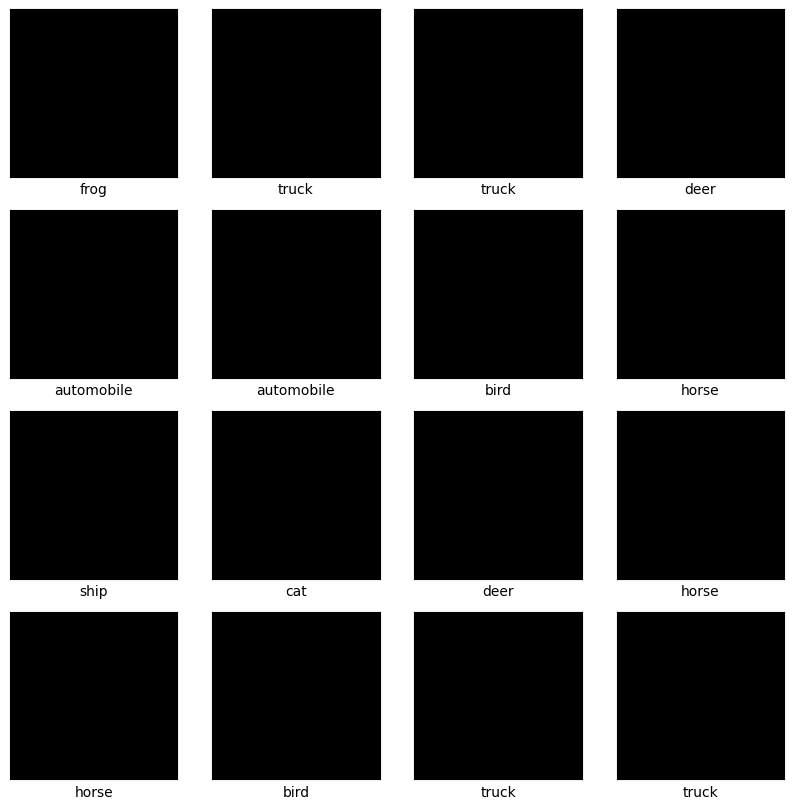

SystemExit: 

In [19]:
# # Normalize: 0,25 -> 0,1
# train_images, test_images = train_images / 255.0, test_images /255.0

# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
#                'dog', 'frog', 'horse', 'ship', 'truck']

# def show():
#   plt.figure(figsize= (10,10))
#   for i in range (16):
#     plt.subplot(4,4,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_labels[i][0]])
#   plt.show()

# show()

# import sys; sys.exit()

In [29]:
# # # model
# # model = keras.models.Sequential()

# # # Loss and optimizer
# # loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# # optim = keras.optimizers.Adam(learning_rate=0.001)
# # metrics = ["accuracy"]

# # model.compile(optimizer=optim, loss=loss, metrics=metrics)

# model = Sequential([
#   Flatten(input_shape=(28, 28)),
#   Dense(128, activation='relu'),
#   Dense(10, activation='softmax')
# ])

# model.compile(optimizer=Adam(),
#               loss=SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

In [41]:
# # training
# batch_size = 64
# epochs = 5

# model.fit(train_images, train_labels, epochs=epochs,
#           batch_size=batch_size, verbose=2)

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 32, 32, 3)


In [43]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN architecture
def create_cnn(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))

    # Flatten layer to transition from convolutional layers to dense layers
    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for classification

    return model

# Define input shape and number of classes
input_shape = (28, 28, 1)  # Assuming input images are grayscale 28x28
num_classes = 10  # Number of classes (e.g., 10 for MNIST digits)

# Create CNN model
model = create_cnn(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy loss for integer labels
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              